# Adsorption mechanism of single amino acid to Au {111} surface in aqueous solution

Noemi, Politecnico di Milano, September 2022

## Introduction
<p style='text-align: justify; margin-right: 35px;'> 
This project is based on the paper [1] that analyses the adsorption mechanism of several amino acids and surfactants on a {111} surface of gold using molecular dynamic simulation with the intermolecular potential CHARMM-METAL. The aim is to compare the adsorption mechanism and energy of an arginine molecule on {111} and {100} Au surfaces. I limited myself to the analysis of the adsorption mechanism of a single peptide - arginine.

## Force Field
### CHARMM - METAL and IFF
<p style='text-align: justify; margin-right: 35px;'> 
CHARMM-METAL FF can be seen nowadays in the broader picture of Interface Force Field (IFF). <br>
In contrast to the availability and quality of parameters for organic molecules, force fields for inorganic compounds such as silicates, aluminates, oxides, and metals are often not available or exhibit large deviations relative to known surface properties. In particular:
    
* computed interfacial properties such as hydration energies, surface tensions, and adsorption energies may depart by multiples from measurements; 
* pH equilibria and other details of surface structures have been frequently disregarded; 
* some models require fixed atom positions during simulation to avoid shrinkage or amorphization;
* the simulation of organic–inorganic and biomolecular–inorganic interfaces is hardly possible when the energy expressions for inorganic and organic compounds are dissimilar (i.e., with many of the specialized force fields).
    
<p style='text-align: justify; margin-right: 35px;'> 
The INTERFACE force field overcomes these challenges and enables the accurate simulation of inorganic compounds, biomolecules, and polymers using a single platform. 
The INTERFACE force field is a collection of all-atom parameters for inorganic compounds that have individually undergone extensive validation, reproduce a multitude of bulk and surface properties in excellent agreement with measurements, and reduce deviations from experimental data by up to 2 orders of magnitude compared to alternative force fields. The parametrization builds on an in-depth understanding of physical–chemical properties on the atomic scale to assign each parameter as well as on the validation of macroscale physical–chemical properties for each compound in comparison to measurements. The parameters employ the same harmonic energy expressions as existing parameters for biomolecules, solvents, and polymers using standard combination rules.
More than 20 common minerals, metals, and poly(ethylene oxide) are currently included. Parameters were initially developed for clay minerals, followed by cement minerals, fcc metals, silica, sulfates, phosphates, cement minerals, PEO, and apatites. Most of these developments were individually reported and extensively tested as part of various platforms (PCFF, CVFF, and CHARMM). [2]
With CHARMM-METAL we include just the parameters developed for fcc metals. 

### CHARMM36
<p style='text-align: justify; margin-right: 35px;'> 
CHARMM is a class I force field that has a functional form of the type:

\begin{align}
 E_{pot} = \sum_{ij bonded}K_{r,ij}(r_{ij}-r_{0,ij})^2 + \sum_{ijk bonded}K_{\theta,ijk}(\theta_{ijk}-\theta_{0,ijk})^2 +  \sum_{ijk bonded}K_{S,ijk}(S_{ijk}-S_{0,ijk})^2 + \sum_{ijkl bonded}V_{\phi,ijkl}(1 + cos(n \phi_{ijkl} - \phi_{0, ijkl})) + \sum_{ijkl bonded}K_{\chi ,ijkl}( X_{ijkl} - X_{0, ijkl})^2 +\frac {1} {4\pi\epsilon_0\epsilon_r} \sum_{ij non bonded } \frac{q_iq_j}{r_{ij}} + \sum_{ij non bonded} \epsilon_{ij} \left( \left( \frac {r_{0,ij}} {r_{ij}} \right)^ {12} - 2 \left(\frac{r_{0,ij}}{r_{ij}}\right)^{6}\right)
\end{align}
<p style='text-align: justify; margin-right: 35px;'> 
The total potential energy of the simulation system depends only on the Cartesian coordinates of the atoms and contains contributions from intramolecular (bonded) interactions as well as from intermolecular (nonbonded) interactions. The potential energy of class I force fields contains additive terms for a quadratic bond stretching potential, a quadratic angle bending potential, an Urey Bradley term,  a trigonometric torsion potential, a quadratic out-of-plane potential, Coulomb interactions, van der Waals interactions.
All-atom force fields provide parameters for every type of atom in a system, including hydrogen. [1] <br><br>
In LAMMPS, the pair style lj/charmmfsw/coul/long and similar are the implementations of the CHARMM force fiels. They compute LJ and Coulombic interaction with additional switching of shifting functions that ramp the force smoothly to zero between an inner and outer cutoff.
 \begin{align}
 E & =  LJ (r)            & r < r_{in}\\
   & = S(r) * LJ(r)       & r _{in} < r < r_{out}\\
   & = 0                  & r > r_{out}\\ 
 E & =  C (r)             & r < r_{in}\\
   & = S(r) * C(r)        & r _{in} < r < r_{out}\\
   & = 0                  &  r > r_{out}\\
LJ(r) & = 4\epsilon \left( \left(\frac {\sigma}{r} \right)^{12} - \left(\frac {\sigma}{r} \right)^{6} \right) \\
 C(r) & = \frac {C q_i q_j} {\epsilon r}\\
\end{align}

### 12-6 Lennard Jones Potentials for Face-Centered Cubic metal
<p style='text-align: justify; margin-right: 35px;'> 
Since metallic nanostructures and their interfaces with biological molecules, surfactants solvents and organic matter have gained importance in many applications (sensors, optical, electronic and biomedical devices), the introduction of suitable Lennard Jones (LJ) parameters for the accurate simulation of fcc elements metals and their nanometer-scale interfaces gained more interest.<br> Lennard-Jones types of parameter where chosen since Molecular dynamics and Monte Carlo simulation often rely on LJ potentials for nonbond interactions and at the classical mechanical level, LJ potential can be employed for substaintially larger systems ($10^{6}$ atoms), and dynamical processes on a tune scale up to 1 microseconds are accessible. LJ potential are often used in the 12-6 form and in the 9-6 form.
    
\begin{align}
 E =  \sum_{ij non bonded} \epsilon_{ij} \left( \left( \frac {r_{0,ij}} {r_{ij}} \right)^ {12} - 2 \left(\frac{r_{0,ij}}{r_{ij}}\right)^{6}\right) \\
 E =  \sum_{ij non bonded} \epsilon_{ij} \left( 2\left( \frac {r_{0,ij}} {r_{ij}} \right)^ {9} - 3 \left(\frac{r_{0,ij}}{r_{ij}}\right)^{6}\right)
\end{align}
    
A 12-6 LJ potential is employed in CHARMM, where $\varepsilon_0$ represents the equilibrium nonbond energy and $r_0$ the equilibrium nonbond distance between two atoms of the same type. <br><br> In our case, this two adjustable parameters in the LJ model represent the density and the surface free energy at a given point in the phase diagram. Since LJ model cannot cover a wide range of temperature, a reference state is necessary and temperature of 298.15 K and pressure of 1 atm was considered. The evaluation of the LJ model is based on the computation of densities, surface tensions of the {111} and {100} faces, interface tensions with water and isotropic elastic constant.<br> Parameters are indipendent from combination rules and from scaling of nonbond interaction between 1,4 bonded atoms.The approach to derive LJ parameters for metals differs from common approaches for non polar organic liquids. $r_0$ and $\varepsilon_0$ can be directly implemented in force fields which use a LJ potential and will lead to the same computed equilibrium density and surface tension of cleavage planes of the pure fcc metal. Combination rule to derive the parameters $\varepsilon_{0ij}$  and $r_{0ij}$ for nonbond interactions between different atom types i and j offer a convenient pathway to unite the LJ paramters for fcc metals with parameters for many compounds. In CHARMM, an arithmetic mean for 12-6 potential is possible.
\begin{align}
 \epsilon_{ij} & = \sqrt {\epsilon_i \epsilon_j} \\ \sigma_{ij} & = \frac{1}{2}(\sigma_i + \sigma_j) 
\end{align}
Here is a list of the parameter for different metals.
<table align = 'left' width = '975' height = '1000'>
    <tr><th> Metal <th> <th> $\varepsilon_{0ij}$ (kcal/mol) <th><th>$r_0$ (Å)<th><tr><tr>
    <tr><td> Au <td><td> 5.29 <td><td> 2.951 <td><tr>
    <tr><td> Ag <td><td> 4.56 <td><td> 2.955 <td><tr>
    <tr><td> Pd <td><td> 6.15 <td><td> 2.819 <td><tr>
<table>   
As we see, in the paper the LJ potential is expressed differently from what LAMMPS documentation reports. Knowing that:
\begin{align}
 \sigma = \frac{r}{2^{1/6}}
\end{align}
For gold, LJ parameters are $r_0$ = 2.951 Å, $\sigma$ = 2.629 Å and $\varepsilon_0$ = 5.29 kcal/mol. [3]

## Building the system

<p style='text-align: justify; margin-right: 35px;'> 
The aim of this work is to determine the adsorption energy of a single peptide on a gold surface. There are different methods to do so. <br> 
    1. A simple approach involves the simulation of the adsorbate on the surface and in solution using the same box size and box content. The box needs to be large enough to avoid contact of the adsorbate  with the surface during the solution run. However, large boxes result in high values and large fluctuations of the total energy which require extra simulation time to compute the relatively small energy difference $\Delta E$ = $E_1$ - $E_2$ between simulation 1 and 2. The time dependence on the number of particles N is typically in the order of $N^2$ for summations of Coulomb interactions using the Ewad method and for summations of van-der-Walls interaction using spherical cutoffs and in the order of $N ln N$ for summation of Coulomb interactions using the PPPM method. Method 1 is less efficient due to the inclusion of many water molecules in the surface run and due to the inclusion of the surface atoms and surrounding water molecule in the solution run. <br>
    <img src= "method_1.jpg" height = '400' width= '800' >
    2. A more efficient procedure consists of a total of four calculations with smaller boxes which is approximately twice as fast as two calculations with larger boxes using Ewald procedures or spherical cutoffs for Lennard-Jones interactions. For computational screening of additional adsorbates on the same suface, only two additional calculation per adsorbate are required to obtain $E_{surf+A+H_{2}O}$ and $E_{A+H_{2}0}$ while the values for $E_{H_{2}O}$ and $E_{A+H_{2}O}$ remain the same.<br> A further advantage of method 2 over method 1 is the reduction of the total energy and its standard deviation, which lowers the standard deviation of computed adsorption energies on an absolute scale. <br> Using the same cross section (A = xy of the box), the box height (z) is incrementally additive for every component added. Simulations are best performed using the NVT ensemble. [4]    
    <img src= "method_2.jpg" height = '400' width= '800' >

For the computation of the adsorption energy and analysis of the binding mechanism of the arginine, simulation boxes of the neat solvent system, the solute-solvent system, the surface-solvent system and the surface-solute-solvent were prepared. <br> 
### Neat solvent
<p style='text-align: justify; margin-right: 35px;'> 
The waterbox builder of CHARMM-GUI was used to create the pdb file of a box of dimensions 20.188 x 19.980 x 37.570 $Å^3$ containing only 507 molecules of water. The density of the box at this point is 1.00 g/cm^3.
    
Once we have obtained the pdb file, it is possible to get the data file with the assignment of the force field thanks to CHARMM GUI [5] [Pdb reader and Force Field converter section].

The simulation were performed using LAMMPS [6]. LAMMPS is a classical molecular dynamics (MD) code that models ensembles of particles in a liquid, solid, or gaseous state. 
    
#### Energy minimization
```lammps
echo            screen
variable        outputname index 2_solv_min

units           real
boundary        p p p

newton          off
pair_style      lj/charmmfsw/coul/long 10 12
pair_modify     mix arithmetic
kspace_style    pppm 1e-6

atom_style      full
bond_style      harmonic
angle_style     charmm
dihedral_style  charmmfsw
special_bonds   charmm
improper_style  harmonic
timestep        1

read_data       only_solvent.data

neighbor        2 bin
neigh_modify    delay 5 every 1
dump           mydmp all atom 100 ${outputname}.lammpstrj

#velocity        all create 298.15 38416 dist gaussian
#include         restraints/constraint_angletype

thermo          100
thermo_style    custom step time xlo xhi ylo yhi zlo zhi vol temp density press etotal pe ke ebond eangle edihed eimp evdwl ecoul elong

log            log.${outputname} append
min_style       cg
minimize        0.0 1.0e-8 10000 20000

write_data      ${outputname}.data
write_dump      all custom ${outputname}.dump id type x y z vx vy vz ix iy iz
write_dump      all xyz ${outputname}.xyz modify sort id element O H
```
Boundary condition: the style p means the box is periodic, so that particles interact across the boundary and they can exit one end of the box and re-enter the other end.<br>
Pair style: implementation of CHARMM force field<br>
Pair modify: the way in which we determine the interaction between atoms of different types when they are not set explicitely <br>

#### Equilibration
After an energy minimization, a NPT equilibration was performed for 0.04 ns with a timestep of 1 ft at a temperature of 298.15 K.
```
echo            screen
variable        dcdfreq index 2500
variable        outputname index 2_solv_equi
variable        inputname  index 2_solv_min

units           real
boundary        p p p

newton          off
pair_style      lj/charmmfsw/coul/long 10 12
pair_modify     mix arithmetic
kspace_style    pppm 1e-6

atom_style      full
bond_style      harmonic
angle_style     charmm
dihedral_style  charmmfsw
special_bonds   charmm
improper_style  harmonic
timestep        1

read_data       only_solvent.data

variable        laststep file ${inputname}.dump
next            laststep
read_dump       ${inputname}.dump ${laststep}  x y z vx vy vz ix iy iz box yes replace yes format native

neighbor        2 bin
neigh_modify    delay 5 every 1
dump           mydmp all atom 100 ${outputname}.lammpstrj

velocity        all create 298.15 38416 dist gaussian

fix             1 all shake 1e-6 500 ${dcdfreq} m 1.008 a 1
fix             2 all npt temp 298.15 298.15 100.0 z 0.0 0.0 100.0

thermo          ${dcdfreq}
thermo_style    custom step time xlo xhi ylo yhi zlo zhi vol temp density press etotal pe ke ebond eangle edihed eimp evdwl ecoul elong
log            log.${outputname} append

reset_timestep  0
run             40000
write_data      ${outputname}.data
write_dump      all custom ${outputname}.dump id type x y z vx vy vz ix iy iz
write_dump      all xyz ${outputname}.xyz modify sort id element O H
```
During the equilibration, the angle in the water molecule and the mass of H is held thanks to the SHAKE algorithm. 
The NPT equilibration, performed to get the right density of the system, is done letting the volume varying only in the z direction.
#### Simulation
The only difference to respect to the equilibration step is:
```
fix             2 all nvt temp 298.15 298.15 100.0
...
reset_timestep  0
run             100000
```
The simulation time is 0.1 ns.

Mean energy of solvent is: -3790.14 kcal/mol
Density is: 1.0 g/cm^3


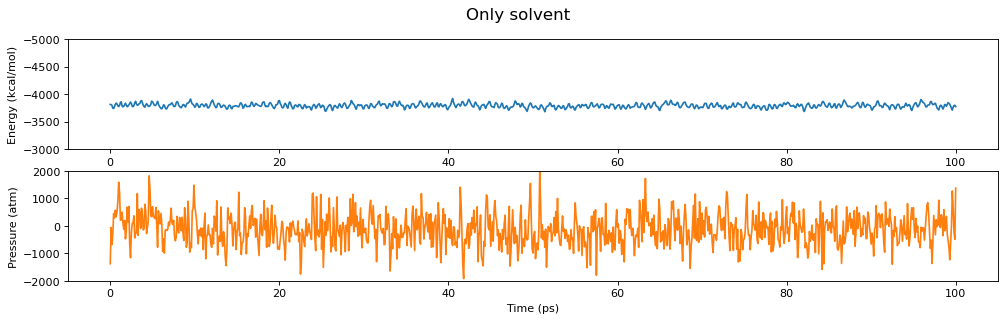

In [1]:
import numpy as np
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

tmin, tmax, npt = 0, 100, 1001
times = np.linspace(tmin, tmax, npt)

import os
os.chdir("C:/Users/Noemi/Desktop/report/only_solvent")   #TO BE CHANGED
os.getcwd()
tmin, tmax, npt = 0, 100, 1001
times = np.linspace(tmin, tmax, npt)
# Read energies from file
Energies = np.zeros(npt)
Pressure = np.zeros(npt)
Density  = np.zeros(2)
with open('solv_production_energy.dump', 'r') as inFile: 
    l = 0
    for line in inFile:
        s = line.split()
        Energies[l] = float(s[-1])
        l += 1  
with open('solv_production_pressure.dump', 'r') as inFile:
    l = 0
    for line in inFile:
        s = line.split()
        Pressure[l] = float(s[-1])
        l += 1 
with open('solv_production_density.dump', 'r') as inFile: 
    l = 1
    for line in inFile:
        s = line.split()
        Density[l] = float(s[-1])

mean_energy_solvent = statistics.mean(Energies)
print ("Mean energy of solvent is:", round(mean_energy_solvent,2),"kcal/mol")
print ("Density is:", round(Density[1],2),"g/cm^3")

plt.figure(figsize=(15, 4), dpi=80)
plt.suptitle('Only solvent', fontsize=15)
plt.subplot(211)
plt.plot(times, Energies)
plt.ylabel('Energy (kcal/mol)')
plt.ylim (-3000,-5000)
plt.subplot(212)
plt.plot(times, Pressure, 'tab:orange')
plt.ylim(-2000,2000)
plt.xlabel('Time (ps)')
plt.ylabel('Pressure (atm)');
plt.show()

### Solvent-solute system
#### Arginine
<table align="right">
    <tr>
    <td> <img src= "arginine_molecule_2.png" width="300"  style="display=block; top-margin:0" > </td> 
    </tr>
    <tr>
    <td><img src= "arginine_molecule_3.png" width="300"  style="display=block; top-margin:0"></td>
    </tr>
    <td> <img src= "arginine_scheme.png" width="300" style="display=block; top-margin:0" >     </td>
    </tr>
</table>
<p style="text-align: left" style="display=block; margin:auto">
    It is an amino acid characterized by 3-carbon aliphatic straight chain, the distal end of which is capped by a  guadinium group, that is always protonated and positively charged at physiological pH. The positive charge is delocalized because of the conjugation between the double bond and the nitrogen lone pair. [7]  <br>
    This structure was imported from Avogadro and then the molecule was solvated thanks to Packmol.
</p>

```packmol
tolerance 2.0
filetype pdb

structure arginine.pdb
  number 1
  fixed 0. 0. -20.7370 0. 0. 0.
  centerofmass
end structure

structure water.pdb
  number 507
  inside box -10.0940 -9.9900 -20.7370 10.0940  9.9900  20.7370
end structure

structure CLA.pdb
  number 2
  inside box -10.0940 -9.9900 -20.7370 10.0940  9.9900  20.7370
end structure

structure SOD.pdb
  number 1
  inside box -10.0940 -9.9900 -20.7370 10.0940  9.9900  20.7370
end structure

output solvproteinau.pdb

```
<p style='text-align: justify; margin-right: 35px;'> 
CHARMM-GUI was used to assign the FF to the system and create a data file compatible with LAMMPS. We get the molecule in the zwitterionic form.
Once everything is set, it is possible to repeat the energy minimization, equilibration and production set for this system. Before the equilibration, the density of the system is 0.93 g/cm^3.

Equilibration and production animation
<table align="middle">
    <tr>
        <td> <img src= "solute_solvent/equilibration2.gif"> </td>
        <td> <img src= "solute_solvent/production2.gif"> </td>
    </tr>
</table>

Mean energy of solvent is: -4712.54 kcal/mol
Density is: 1.05 g/cm^3


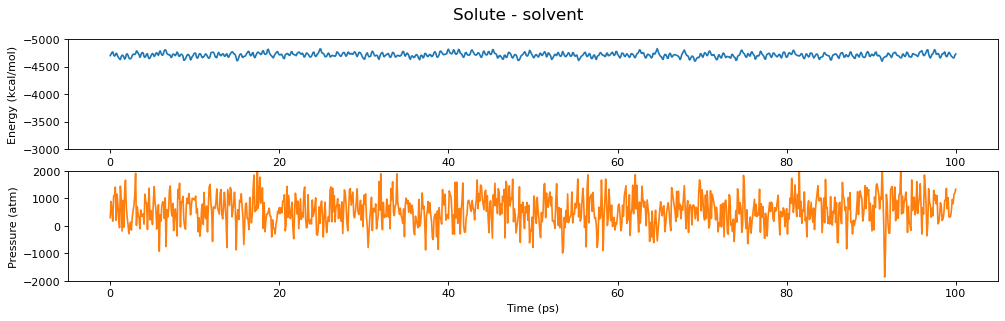

In [2]:
import numpy as np
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir("C:/Users/Noemi/Desktop/report/solute_solvent")   # TO BE CHANGED
os.getcwd()
tmin, tmax, npt = 0, 100, 1001
times = np.linspace(tmin, tmax, npt)
# Read energies from file
Energies = np.zeros(npt)
Pressure = np.zeros(npt)
Density  = np.zeros(2)
with open('pep_solv_production_energy.dump', 'r') as inFile: 
    l = 0
    for line in inFile:
        s = line.split()
        Energies[l] = float(s[-1])
        l += 1  
with open('pep_solv_production_pressure.dump', 'r') as inFile:
    l = 0
    for line in inFile:
        s = line.split()
        Pressure[l] = float(s[-1])
        l += 1 
with open('pep_solv_production_density.dump', 'r') as inFile: 
    l = 1
    for line in inFile:
        s = line.split()
        Density[l] = float(s[-1]) 

mean_energy_arg_solvent = statistics.mean(Energies)
print ("Mean energy of solvent is:", round(mean_energy_arg_solvent,2),"kcal/mol")
print ("Density is:", round(Density[1],2),"g/cm^3")

plt.figure(figsize=(15, 4), dpi=80)
plt.suptitle('Solute - solvent', fontsize=15)
plt.subplot(211)
plt.plot(times, Energies)
plt.ylabel('Energy (kcal/mol)')
plt.ylim (-3000,-5000)
plt.subplot(212)
plt.plot(times, Pressure, 'tab:orange')
plt.ylim(-2000,2000)
plt.xlabel('Time (ps)')
plt.ylabel('Pressure (atm)');
plt.show()

### Surface-solvent system
<p style='text-align: justify; margin-right: 35px;'> 
Embending the solvent to the surface requires a further step, since it is necessary to build the entire system before performing the analysis.

```lammps
echo screen
variable        outputname index solv_surf_closer

#------initialization
units 		real
boundary    p p p

newton          off
pair_style      lj/charmmfsw/coul/long 10 12
pair_modify     mix arithmetic
kspace_style    pppm 1e-6

atom_style 	    full
bond_style      harmonic
angle_style     charmm
dihedral_style  charmmfsw
special_bonds   charmm
improper_style  harmonic
timestep        1

lattice         fcc 4.0782 orient x 1 -2 1 orient y 1 0 -1 orient z 1 1 1
region          box block -10.094 10.094 -9.99 9.99 -34.912 18.785 units box
create_box      3 box &
                bond/types 1 & 
                angle/types 1 &
                extra/bond/per/atom 2 &
                extra/angle/per/atom 1 &
                extra/special/per/atom 2

#-------- add the waterbox
region          water block -10.093 10.093 -9.99 9.99 -18.7850 18.7850 units box
group           waterbox region water
read_data       solvent.data add merge group waterbox
#--------- create the lattice
region          gold block -10.093 10.093 -9.99 9.99 -34.912 -20.785 units box
create_atoms    3 region gold
mass            3 197
group           au region gold

pair_coeff      3 3 5.29 2.629

#delete_atoms   overlap 2.0 waterbox au bond yes
info            region
dump 	         	mydmp all image 10 dump.*2.jpg type type
thermo_style    custom step time xlo xhi ylo yhi zlo zhi vol temp density press etotal pe ke ebond eangle edihed eimp evdwl ecoul elong

# ------------- run
run	           	10
write_data	    ${outputname}.data pair ij
write_dump      all custom ${outputname}.dump id type element mass x y z vx vy vz ix iy iz
write_dump      all xyz ${outputname}.xyz modify sort id element O H Au
```
<p style='text-align: justify; margin-right: 35px;'>
Pairwise interactions, bonds, dihedrals and so on are defined in the same way we have seen previously for the solvent. <br> Now we set the spatial region that will host the waterbox and the fcc lattice. It is now necessary to define the lattice of type fcc, oriented along (111) in z direction and characterized by the lattice parameter of gold. The lattice in LAMMPS is simply a set of points in space, that is replicated infinitely in all dimensions. To fill it with atoms, the region must be defined. In this case, the region parameter were defined such that we would get a box of dimension 20.188 x 19.98 x 51.696 $Å^3$. Thanks to create_box, we are able to create a simulation box based on the specified region. It is necessary to specify in advance the number of atom types that will be present in the system and all the bonds, angle type that are defined in the read_data file.
Then in the upper region we place the waterbox and in the lower region we place the lattice of height 14.127 Å.They are distanced by a couple of Å. The lattice was created with the create_atoms command, which is the most effettive way to add a new atom type and define separately its coefficients.
The same was done for the fcc lattice oriented along (001) in z direction.
<table align="middle">
    <tr>
        <td> <img src= "surface_solvent/111/solvate_surf.png"></td>
        <td> <img src= "surface_solvent/100/solvate_surf_2.png"> </td>
    </tr>
</table>

##### Density in g/cm^3
<table align = 'left' width = '975' height = '1000'>
    <tr align =><th>  <th> <th> Lattice <th><th> Box <th><tr><tr>
    <tr><td> {100} <td><td> 13.95 <td><td> 4.54 <td><tr>
    <tr><td> {111} <td><td> 18.71 <td><td> 5.84 <td><tr>
<table><br><br>

#### Energy minimization

```lammps
echo screen
variable        outputname index 3_surf_solv_minimization
variable        inputname index 11_solv_surf_closer
#------initialization
units 		real
boundary   p p p

newton          off
pair_style      lj/charmmfsw/coul/long 10 12
pair_modify     mix arithmetic
kspace_style    pppm 1e-6

atom_style 	full
bond_style      harmonic
angle_style     charmm
dihedral_style  charmmfsw
special_bonds   charmm
improper_style  harmonic
timestep        1

read_data       ${inputname}.data

group          water type 1 2
group          gold  type 3

dump           mydmp all atom 100 ${outputname}.lammpstrj

fix            1 gold setforce 0 0 NULL
fix            2 gold aveforce NULL NULL 0
neigh_modify    exclude group gold gold

fix		         myrct all recenter NULL NULL INIT

thermo         50
thermo_style   custom step time xlo xhi ylo yhi zlo zhi vol temp density press etotal pe ke ebond eangle edihed eimp evdwl ecoul elong
#------minimization
log            log.${outputname} append
min_style      cg
minimize       0.0 1.0e-8 30000 300000

```
<p style='text-align: justify; margin-right: 35px;'>
When performing the minimization it is not possible to fix bonds or angles with fix SHAKE, but we fix the position of the gold atoms, assigning a fix that cancels the x and y components of the forces applied on the atoms of the group at each time step. Therefore, if these atoms have no initial velocity, they won't move along x and y. These fix does nothing to the z component. The fix aveforce applied in correspondance of the z direction averages all the force exerted on the atoms of the group over z. So all the atoms move as a block over z. The additional fix recenter mantains the system centered in the middle of the box in the z direction.<br> Also, during the evaluation the interaction between gold atoms was excluded (neigh_modify exclude) because the value of pressure registered is in this scenario is in the order of 5 x 10$^4$ atm. <br>
However this leads to a warning: Neighbor exclusions used with KSpace solver may give inconsistent Coulombic energies. But in our case the gold particles are not charged so this is not a problem. This saves computational time. 
    
#### Equilibration
    
```lammps
echo            screen
variable        outputname index 5_surf_solv_equilibration
variable        inputname index 3_surf_solv_minimization
#------initialization
units 		      real
boundary        p p p

newton          off
pair_style      lj/charmmfsw/coul/long 10 12
pair_modify     mix arithmetic
kspace_style    pppm 1e-6

atom_style 	    full
bond_style      harmonic
angle_style     charmm
dihedral_style  charmmfsw
special_bonds   charmm
improper_style  harmonic
timestep        1

read_data       ${inputname}.data
#next           laststep
#read_dump      ${inputname}.dump ${laststep}  x y z vx vy vz ix iy iz box yes replace yes format native

group           water type 1 2
group           gold  type 3
dump 	         	mydmp all atom 500 ${outputname}.lammpstrj

velocity        water create 298.15.0 4928459 rot yes dist gaussian
fix             1 gold setforce 0 0 NULL
fix             s gold aveforce NULL NULL 0
neigh_modify    exclude group gold gold

fix             2 all shake 1e-6 500 200 a 1 b 1
fix             3 water npt temp 298.15 298.15 100.0 z 0.0 0.0 100.0
fix		          myrct all recenter NULL NULL INIT

thermo          100
thermo_style    custom step time xlo xhi ylo yhi zlo zhi vol temp density press etotal pe ke ebond eangle edihed eimp evdwl ecoul elong

log             log.${outputname} append

reset_timestep  0
run             40000

write_data      ${outputname}.data pair ij
write_dump      all custom ${outputname}.dump id type element mass x y z vx vy vz ix iy iz
write_dump      all xyz ${outputname}.xyz modify sort id element O H Au
```
As before, we fix the water molecule and have an equilibration and production run.
#### Production
```lammps
echo            screen
variable        outputname index 2_surf_solv_production
variable        inputname index 5_surf_solv_equilibration
#------initialization
units 		    real
boundary        p p p

newton          off
pair_style      lj/charmmfsw/coul/long 10 12
pair_modify     mix arithmetic
kspace_style    pppm 1e-6

atom_style 	    full
bond_style      harmonic
angle_style     charmm
dihedral_style  charmmfsw
special_bonds   charmm
improper_style  harmonic
timestep        1

read_data       ${inputname}.data
#variable       laststep file ${inputname}.dump
#next           laststep
#read_dump      ${inputname}.dump ${laststep}  x y z vx vy vz ix iy iz box yes replace yes format native

group           water type 1 2
group           gold  type 3
dump 	        mydmp all atom 500 ${outputname}.lammpstrj

neighbor        2 bin

#velocity       all create 298.15.0 4928459 rot yes dist gaussian
fix             1 gold setforce 0 0 NULL
fix             s gold aveforce NULL NULL 0
neigh_modify    exclude group gold gold
fix             2 all shake 1e-6 500 200 a 1 b 1
fix             3 water nvt temp 298.15 298.15 100.0
fix		        myrct all recenter NULL NULL INIT

thermo          100
thermo_style    custom step time xlo xhi ylo yhi zlo zhi vol temp density press etotal pe ke ebond eangle edihed eimp evdwl ecoul elong

variable        E_t equal etotal
variable        time equal time*0.001
fix             write1 all print 100 "${time} ${E_t}" file ${outputname}energy.dump screen no

variable        pressure equal press
fix             write2 all print 100 "${time} ${pressure}" file ${outputname}pressure.dump screen no

variable        rho equal density
fix             write3 all print 100 "${time} ${rho}" file ${outputname}density.dump screen no

log             log.${outputname} append

reset_timestep  0
run             100000

write_data      ${outputname}.data pair ij
write_dump      all custom ${outputname}.dump id type element mass x y z vx vy vz ix iy iz
write_dump      all xyz ${outputname}.xyz modify sort id element O H Au
```
Equilibration and production animation
<table align="middle">
    <tr>
        <td> <img src= "surface_solvent/111/solvate_surf_eq.gif"> </td>
        <td> <img src= "surface_solvent/111/solvate_surf_prod.gif"> </td>
    </tr>
</table>

ciao
Mean energy of solvent is: -4206.69 kcal/mol
Density is: 6.1 g/cm^3


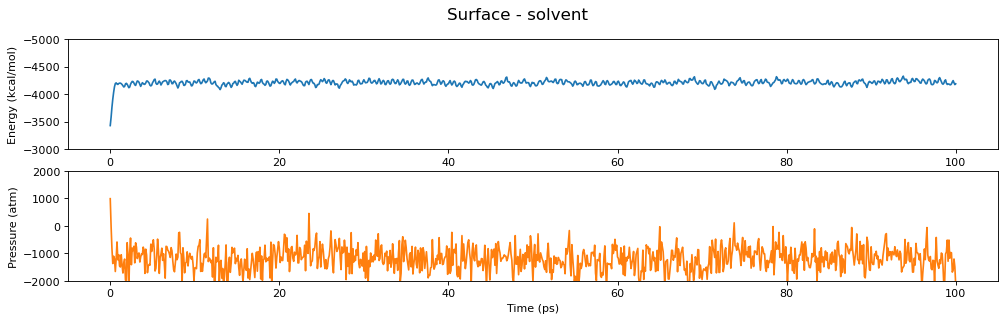

In [13]:
#111
import numpy as np
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
print('ciao')
import os
os.chdir("C:/Users/Noemi/Desktop/report/surface_solvent/111")  
os.getcwd()
tmin, tmax, npt = 0, 100, 1001
times = np.linspace(tmin, tmax, npt)
# Read energies from file
Energies = np.zeros(npt)
Pressure = np.zeros(1001)
Density  = np.zeros(2)
with open('surf_solv_production_111energy.dump', 'r') as inFile:
    l = 0
    for line in inFile:
        s = line.split()
        Energies[l] = float(s[-1])
        l += 1  
with open('surf_solv_production_111pressure.dump', 'r') as inFile: 
    l = 0
    for line in inFile:
        s = line.split()
        Pressure[l] = float(s[-1])
        l += 1 
with open('surf_solv_production_111density.dump', 'r') as inFile: 
    l = 1
    for line in inFile:
        s = line.split()
        Density[l] = float(s[-1]) 
        
mean_energy_solvent_surf = statistics.mean(Energies)
print ("Mean energy of solvent is:", round(mean_energy_solvent_surf,2),"kcal/mol")
print ("Density is:", round(Density[1],2),"g/cm^3")

plt.figure(figsize=(15, 4), dpi=80)
plt.suptitle('Surface - solvent', fontsize=15)
plt.subplot(211)
plt.plot(times, Energies)
plt.ylabel('Energy (kcal/mol)')
plt.ylim (-3000,-5000)
plt.subplot(212)
plt.plot(times, Pressure, 'tab:orange')
plt.ylim(-2000,2000)
plt.xlabel('Time (ps)')
plt.ylabel('Pressure (atm)');
plt.show()

### Surface-solute-solvent system
The system was built in the same way as before.

```lammps

lattice         fcc 4.0782 orient x 1 -2 1 orient y 1 0 -1 orient z 1 1 1
region          box block -10.094 10.094 -9.99 9.99 -37.864 20.7370 units box
create_box      15 box &
                bond/types 12 &
                angle/types 23 &
                dihedral/types 20 &
                improper/types 3 &
                extra/bond/per/atom 12 &
                extra/angle/per/atom 23 &
                extra/dihedral/per/atom 29 &
                extra/improper/per/atom 3 &
               extra/special/per/atom 2

#-------- add the waterbox
region          watarg block -10.093 10.093 -9.99 9.99 -20.7370 20.7370  units box
group           gwatarg region watarg
read_data       arginine_solvent.data add merge group gwatarg
#--------- create the lattice
region          gold block -10.093 10.093 -9.99 9.99 -37.864 -23.7370 units box
create_atoms    15 region gold
mass            15 197
group           au region gold
```
In the system we had obviously to adjust the atom types and the height of the system.<br>
Equilibration and production animation
<table align="middle">
    <tr>
        <td> <img src= "surface_solvent_solute/111/solvate_surf_sol_equi.gif"> </td>
        <td> <img src= "surface_solvent_solute/111/solvate_surf_sol_prod.gif"> </td>
    </tr>
</table>


Mean energy of solvent is: -5157.79 kcal/mol
Density is: 6.05 g/cm^3


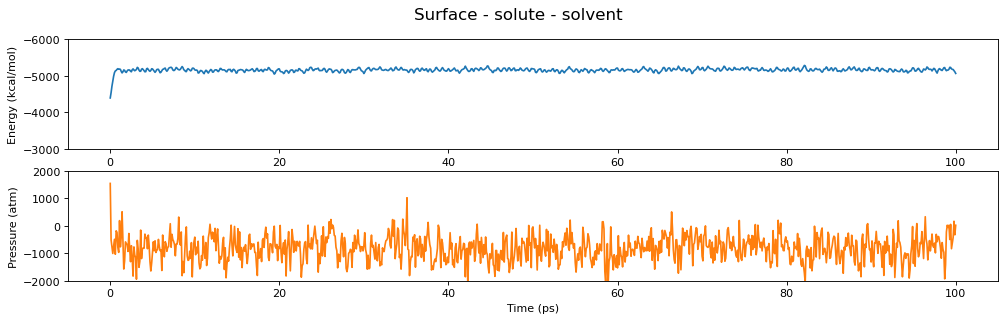

In [14]:
import numpy as np
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir("C:/Users/Noemi/Desktop/report/surface_solvent_solute/111")  
os.getcwd()
tmin, tmax, npt = 0, 100, 1001
times = np.linspace(tmin, tmax, npt)
# Read energies from file
Energies = np.zeros(npt)
Pressure = np.zeros(npt)
Density  = np.zeros(2)
with open('production_111energy.dump', 'r') as inFile: 
    l = 0
    for line in inFile:
        s = line.split()
        Energies[l] = float(s[-1])
        l += 1  
with open('production_111pressure.dump', 'r') as inFile: 
    l = 0
    for line in inFile:
        s = line.split()
        Pressure[l] = float(s[-1])
        l += 1 
with open('production_111density.dump', 'r') as inFile: 
    l = 1
    for line in inFile:
        s = line.split()
        Density[l] = float(s[-1])  

mean_energy_solvent_sol_surf = statistics.mean(Energies)
print ("Mean energy of solvent is:", round(mean_energy_solvent_sol_surf,2),"kcal/mol")
print ("Density is:", round(Density[1],2),"g/cm^3")

plt.figure(figsize=(15, 4), dpi=80)
plt.suptitle('Surface - solute - solvent', fontsize=15)
plt.subplot(211)
plt.plot(times, Energies)
plt.ylabel('Energy (kcal/mol)')
plt.ylim (-3000,-6000)
plt.subplot(212)
plt.plot(times, Pressure, 'tab:orange')
plt.ylim(-2000,2000)
plt.xlabel('Time (ps)')
plt.ylabel('Pressure (atm)');
plt.show()

## Analysis of the results
As seen previously, the mean value of the energy should be:

\begin{align}
\Delta E_{ADS}=\Delta E_{SURF+A+H_2O}-\Delta E_{A+H_2O}+\Delta E_{H_2O}-\Delta E_{SURF+H_2O}
\end{align}

Taking the values seen previously:

In [15]:
 
    mean_energy_solvent_sol_surf - mean_energy_arg_solvent + mean_energy_solvent - mean_energy_solvent_surf 

-28.6998234287621

Comparing this energy with the ones regarding {100}:

In [12]:
    -5122.52 - (-4712.5360) + (-3790.1356) - (-4275.94)

75.82039999999961

<img src= "energy.jpg" width="500" height="350"> 
<p style='text-align: justify; margin-right: 35px;'>
The adsorption energy is -28.69 kcal/mol, more or less in the same order of magnitude of the energy evaluated in the paper. The initial equilibrium geometry of the arginine on the surface is an important factor that leads to difference in the computed energy. Morever, in the computation of [1], the system was equilibrated for 0.4 ns, followed by a simulation of 1 ns and 5 indipendent simulation were performed, considering 5 different initial geometries.<br>The arginine is not absorbed on a (001) Au surface. <br> The realiability of computed adsorption energies using CHARMM - METAL force field is 10% to 20%. So, in general specialized force fiels such as GolP would give more reliable result

## Soft epitaxy adsorption
<p style='text-align: justify; margin-right: 35px;'> 
The results obtained can still be analysed in comparison to the adsorption process on a Au {100} surface to define the binding mechanism of aminoacids on gold surfaces. <br>
Adsorption of metal atoms in the vapor phase onto a solid metal surface occurs at attractive epitaxial sites and non covalent adsorption of organic matter, solvents, and other inorganic matter appers to be guided by epitaxy too. Since noble metal are characterized by an higher surface energy compared to metal oxides and organic surfaces, these metals exhibit deep potential wells at epitaxial sites. Polarizable atoms in molecules near clean (non oxidized) metal surfaces are drawn toward such sites. The better the fit of polarizable atoms of a given molecule to multiple epitaxial sites on the metal surface, the stronger is the overall adsorption. The interactions of molecules with metal surfaces scaling with the degree of geometric coordination of polarizable atoms in solute and solvent molecules to available fcc lattice sites on the surface is called "soft epitaxy". <br><br><br> 
<img src = Concept-of-soft-molecular-epitaxy-for-non-covalent-adsorption-of-organic-molecules-in.png height = "400" width = "600"><br>
<p style='text-align: justify; margin-right: 35px;'> 
The hexagonal symmetry of the {111} surface provides epitaxial sites that match the common geometry of sp2 and sp3 hybridized molecules such as benzene and guanidium group. In contrast, {100} surfaces exhibit a square geometry that is incommensurate with typical chain molecules, yet suitable for allenes and polyynes. The competition between solvent and solutes is then in favour of water and no significant attraction of the organic molecule may be achieved.
Further analysis can be done considering the comparison between this two pictures
     <table align="middle">
    <tr>
        <td> <img src= "surface_solvent_solute/111/5.gif" width="200" height = "400"> </td>
        <td> <img src= "surface_solvent_solute/100/12.gif" width="200" height = "400"></td>
    </tr>
</table>

 <table align="middle">
    <tr>
        <td> <img src= "surface_solvent_solute/111/12.png"> </td>
        <td> <img src= "surface_solvent_solute/100/11.png"> </td>
    </tr>
</table>
<p style='text-align: justify; margin-right: 35px;'> 
In our case metal atoms are shown in decreasing diameter and color from the top atomic layer toward the subjacent atomic layers. Polarizable atoms (S,O, N and C) in solute and solvent molecules attempt a good fit to subjacent lattice sites upon adsorption and avoid metal atoms in the top layer. [1] <br>
On the left, arginine on a (111) surface. On the right, arginine on a (001) surface. 

## Further development
<p style='text-align: justify; margin-right: 35px;'> 
<br> A difference in the initial configuration of the arginine molecule to respect to the surface must be attempeted since it was demonstrated to have a huge impact in the value of the total energy.
A purely dispersive potential of this kind may have limitations when one considers structure: adsorption (of water molecules or peptide atoms) onto hollow sites on the surface is strongly favoured. On metallic surfaces, however, adsorption on top of surface atoms is often preferred, as indicated by first-principles simulations. In the GOlP force field (Iori et al., 2009), dynamical polarization of gold atoms is represented by a rotating dipole, and virtual interaction sites are introduced to tackle the hollow-site adsorption problem. GOlP is parameterized using extensive first-principles calculations and experimental data, with special consideration given to surface interactions with sp2-hybridized carbons. An extension, GOlP–CHARMM, reparameterized for compatibility with CHARMM, also allows consideration of different gold surface (Wright et al., 2013b,a), opening up the study of facet selectivity (Wright et al., 2015).
In GOlP, the gold atoms are held fixed during the simulation.Tang et al. (2013) have compared GOlP results with experimental studies of peptide adsorption, and with the force field of Heinz et al. (2008). While both models perform
reasonably well in describing the trend in amino acid adsorption energies, there are areas such as the prediction of water orientation in the surface layer where GOlP–CHARMM agrees better with first-principles simulations (Nadler and Sanz, 2012). This approach may allow one to separate the enthalpic contributions to the binding free energy, and ascribe them to individual residues (Corni et al., 2013; Tang et al., 2013). [8]

### Techical details
Version of LAMMPS used: LAMMPS (29 Sep 2021 - Update 3)
LAMMPS (29 Sep 2021 - Update 3)
1 OpenMP thread for MPI task
#### Production run
##### Only solvent 
```lammps
Loop time of 3029.89 on 1 procs for 100000 steps with 1422 atoms

Performance: 2.852 ns/day, 8.416 hours/ns, 33.005 timesteps/s
99.0% CPU use with 1 MPI tasks x 1 OpenMP threads

MPI task timing breakdown:
Section |  min time  |  avg time  |  max time  |%varavg| %total
---------------------------------------------------------------
Pair    | 2439.1     | 2439.1     | 2439.1     |   0.0 | 80.50
Bond    | 0.24649    | 0.24649    | 0.24649    |   0.0 |  0.01
Kspace  | 355.17     | 355.17     | 355.17     |   0.0 | 11.72
Neigh   | 210.22     | 210.22     | 210.22     |   0.0 |  6.94
Comm    | 5.9116     | 5.9116     | 5.9116     |   0.0 |  0.20
Output  | 3.2192     | 3.2192     | 3.2192     |   0.0 |  0.11
Modify  | 14.912     | 14.912     | 14.912     |   0.0 |  0.49
Other   |            | 1.12       |            |       |  0.04

Nlocal:        1422.00 ave        1422 max        1422 min
Histogram: 1 0 0 0 0 0 0 0 0 0
Nghost:        13333.0 ave       13333 max       13333 min
Histogram: 1 0 0 0 0 0 0 0 0 0
Neighs:    1.27332e+06 ave 1.27332e+06 max 1.27332e+06 min
Histogram: 1 0 0 0 0 0 0 0 0 0

Total # of neighbors = 1273321
Ave neighs/atom = 895.44374
Ave special neighs/atom = 2.0000000
Neighbor list builds = 4439
Dangerous builds = 0
System init for write_data ...
PPPM initialization ...
  using 12-bit tables for long-range coulomb (src/kspace.cpp:340)
  G vector (1/distance) = 0.27993571
  grid = 24 24 36
  stencil order = 5
  estimated absolute RMS force accuracy = 0.00037139544
  estimated relative force accuracy = 1.1184198e-06
  using double precision FFTW3
  3d grid and FFT values/proc = 41323 20736
Total wall time: 0:50:30

```
##### Solute - solvent 
```lammps
Loop time of 2923.88 on 1 procs for 100000 steps with 1542 atoms

Performance: 2.955 ns/day, 8.122 hours/ns, 34.201 timesteps/s
99.7% CPU use with 1 MPI tasks x 1 OpenMP threads

MPI task timing breakdown:
Section |  min time  |  avg time  |  max time  |%varavg| %total
---------------------------------------------------------------
Pair    | 2349.4     | 2349.4     | 2349.4     |   0.0 | 80.35
Bond    | 1.3772     | 1.3772     | 1.3772     |   0.0 |  0.05
Kspace  | 339.85     | 339.85     | 339.85     |   0.0 | 11.62
Neigh   | 210.35     | 210.35     | 210.35     |   0.0 |  7.19
Comm    | 4.9581     | 4.9581     | 4.9581     |   0.0 |  0.17
Output  | 2.835      | 2.835      | 2.835      |   0.0 |  0.10
Modify  | 14.073     | 14.073     | 14.073     |   0.0 |  0.48
Other   |            | 1.018      |            |       |  0.03

Nlocal:        1542.00 ave        1542 max        1542 min
Histogram: 1 0 0 0 0 0 0 0 0 0
Nghost:        14061.0 ave       14061 max       14061 min
Histogram: 1 0 0 0 0 0 0 0 0 0
Neighs:    1.42509e+06 ave 1.42509e+06 max 1.42509e+06 min
Histogram: 1 0 0 0 0 0 0 0 0 0

Total # of neighbors = 1425089
Ave neighs/atom = 924.18223
Ave special neighs/atom = 2.1309987
Neighbor list builds = 4430
Dangerous builds = 0
System init for write_data ...
PPPM initialization ...
  using 12-bit tables for long-range coulomb (src/kspace.cpp:340)
  G vector (1/distance) = 0.28063545
  grid = 24 24 40
  stencil order = 5
  estimated absolute RMS force accuracy = 0.00035359371
  estimated relative force accuracy = 1.0648116e-06
  using double precision FFTW3
  3d grid and FFT values/proc = 45167 23040
Total wall time: 0:48:44
```
##### Solvent -surface
```lammps
Loop time of 2960.94 on 1 procs for 100000 steps with 1748 atoms

Performance: 2.918 ns/day, 8.225 hours/ns, 33.773 timesteps/s
99.7% CPU use with 1 MPI tasks x 1 OpenMP threads

MPI task timing breakdown:
Section |  min time  |  avg time  |  max time  |%varavg| %total
---------------------------------------------------------------
Pair    | 2146.5     | 2146.5     | 2146.5     |   0.0 | 72.49
Bond    | 0.22144    | 0.22144    | 0.22144    |   0.0 |  0.01
Kspace  | 399.89     | 399.89     | 399.89     |   0.0 | 13.51
Neigh   | 390.17     | 390.17     | 390.17     |   0.0 | 13.18
Comm    | 5.524      | 5.524      | 5.524      |   0.0 |  0.19
Output  | 1.4841     | 1.4841     | 1.4841     |   0.0 |  0.05
Modify  | 16.188     | 16.188     | 16.188     |   0.0 |  0.55
Other   |            | 0.9608     |            |       |  0.03

Nlocal:        1748.00 ave        1748 max        1748 min
Histogram: 1 0 0 0 0 0 0 0 0 0
Nghost:        13887.0 ave       13887 max       13887 min
Histogram: 1 0 0 0 0 0 0 0 0 0
Neighs:    1.29239e+06 ave 1.29239e+06 max 1.29239e+06 min
Histogram: 1 0 0 0 0 0 0 0 0 0

Total # of neighbors = 1292390
Ave neighs/atom = 739.35355
Ave special neighs/atom = 1.6270023
Neighbor list builds = 4443
Dangerous builds = 0
System init for write_data ...
PPPM initialization ...
  using 12-bit tables for long-range coulomb (src/kspace.cpp:340)
  G vector (1/distance) = 0.27878637
  grid = 24 24 45
  stencil order = 5
  estimated absolute RMS force accuracy = 0.00032052815
  estimated relative force accuracy = 9.6523808e-07
  using double precision FFTW3
  3d grid and FFT values/proc = 49972 25920
WARNING: Neighbor exclusions used with KSpace solver may give inconsistent Coulombic energies (src/neighbor.cpp:627)
Total wall time: 0:49:21
```
##### Solvent -surface - solute
```lammps
Loop time of 3242.32 on 1 procs for 100000 steps with 1877 atoms

Performance: 2.665 ns/day, 9.006 hours/ns, 30.842 timesteps/s
99.7% CPU use with 1 MPI tasks x 1 OpenMP threads

MPI task timing breakdown:
Section |  min time  |  avg time  |  max time  |%varavg| %total
---------------------------------------------------------------
Pair    | 2401.3     | 2401.3     | 2401.3     |   0.0 | 74.06
Bond    | 1.4952     | 1.4952     | 1.4952     |   0.0 |  0.05
Kspace  | 408.06     | 408.06     | 408.06     |   0.0 | 12.59
Neigh   | 406.07     | 406.07     | 406.07     |   0.0 | 12.52
Comm    | 5.8458     | 5.8458     | 5.8458     |   0.0 |  0.18
Output  | 1.0205     | 1.0205     | 1.0205     |   0.0 |  0.03
Modify  | 17.524     | 17.524     | 17.524     |   0.0 |  0.54
Other   |            | 1.041      |            |       |  0.03

Nlocal:        1877.00 ave        1877 max        1877 min
Histogram: 1 0 0 0 0 0 0 0 0 0
Nghost:        14422.0 ave       14422 max       14422 min
Histogram: 1 0 0 0 0 0 0 0 0 0
Neighs:    1.39995e+06 ave 1.39995e+06 max 1.39995e+06 min
Histogram: 1 0 0 0 0 0 0 0 0 0

Total # of neighbors = 1399948
Ave neighs/atom = 745.84337
Ave special neighs/atom = 1.7602557
Neighbor list builds = 4464
Dangerous builds = 0
System init for write_data ...
PPPM initialization ...
  using 12-bit tables for long-range coulomb (src/kspace.cpp:340)
  G vector (1/distance) = 0.27713393
  grid = 24 24 45
  stencil order = 5
  estimated absolute RMS force accuracy = 0.00036614431
  estimated relative force accuracy = 1.1026065e-06
  using double precision FFTW3
  3d grid and FFT values/proc = 49972 25920
WARNING: Neighbor exclusions used with KSpace solver may give inconsistent Coulombic energies (src/neighbor.cpp:627)
Total wall time: 0:54:03
```

## Bibliography
[1] Feng, Jie, et al. "Adsorption mechanism of single amino acid and surfactant molecules to Au {111} surfaces in aqueous solution: design rules for metal-binding molecules." Soft Matter 7.5 (2011): 2113-2120. <br>
[2] Heinz, Hendrik, et al. "Thermodynamically consistent force fields for the assembly of inorganic, organic, and biological nanostructures: the INTERFACE force field." Langmuir 29.6 (2013): 1754-1765. <br>
[3] Heinz, Hendrik, et al. "Accurate simulation of surfaces and interfaces of face-centered cubic metals using 12− 6 and 9− 6 Lennard-Jones potentials." The Journal of Physical Chemistry C 112.44 (2008): 17281-17290. <br>
[4] Heinz, Hendrik. "Computational screening of biomolecular adsorption and self‐assembly on nanoscale surfaces." Journal of computational chemistry 31.7 (2010): 1564-1568.<br>
[5] Jo, Sunhwan, et al. "CHARMM‐GUI: a web‐based graphical user interface for CHARMM." Journal of computational chemistry 29.11 (2008): 1859-1865. https://charmm-gui.org/ <br>
[6] Thompson, Aidan P., et al. "LAMMPS-a flexible simulation tool for particle-based materials modeling at the atomic, meso, and continuum scales." Computer Physics Communications 271 (2022): 108171. https://www.lammps.org [Version: 15 Sep 2022] <br>
[7] Arginine - From Wikipedia https://en.wikipedia.org/wiki/Arginine [23/09/2022]
[8] Allen, Michael P., and Dominic J. Tildesley. Computer simulation of liquids. Oxford university press, 2017.